In [1]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_theme(style="whitegrid")

videogames = pd.read_csv('top100videogamesales.csv')
videogames.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,4,New Super Mario Bros.,Nintendo,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,5,Wii Play,Nintendo,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
5,6,New Super Mario Bros. Wii,Nintendo,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
6,7,Nintendogs,Nintendo,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
7,8,Mario Kart DS,Nintendo,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
8,9,Wii Fit,Nintendo,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
9,10,Wii Fit Plus,Nintendo,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00


In [2]:
videogames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          100 non-null    int64  
 1   Name          100 non-null    object 
 2   Platform      100 non-null    object 
 3   Year          100 non-null    int64  
 4   Genre         100 non-null    object 
 5   Publisher     100 non-null    object 
 6   NA_Sales      100 non-null    float64
 7   EU_Sales      100 non-null    float64
 8   JP_Sales      100 non-null    float64
 9   Other_Sales   100 non-null    float64
 10  Global_Sales  100 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 8.7+ KB


### Question 1: Regional Sales by Publisher: Create a stacked column (or bar) chart to show the sales by region for each publisher in the data. Explain your chart with markdown and detail which publisher had the most sales.

C:\Users\gabri\AppData\Local\Temp\ipykernel_26364\3521252990.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  videogames_grouped = videogames.groupby('Publisher').sum()


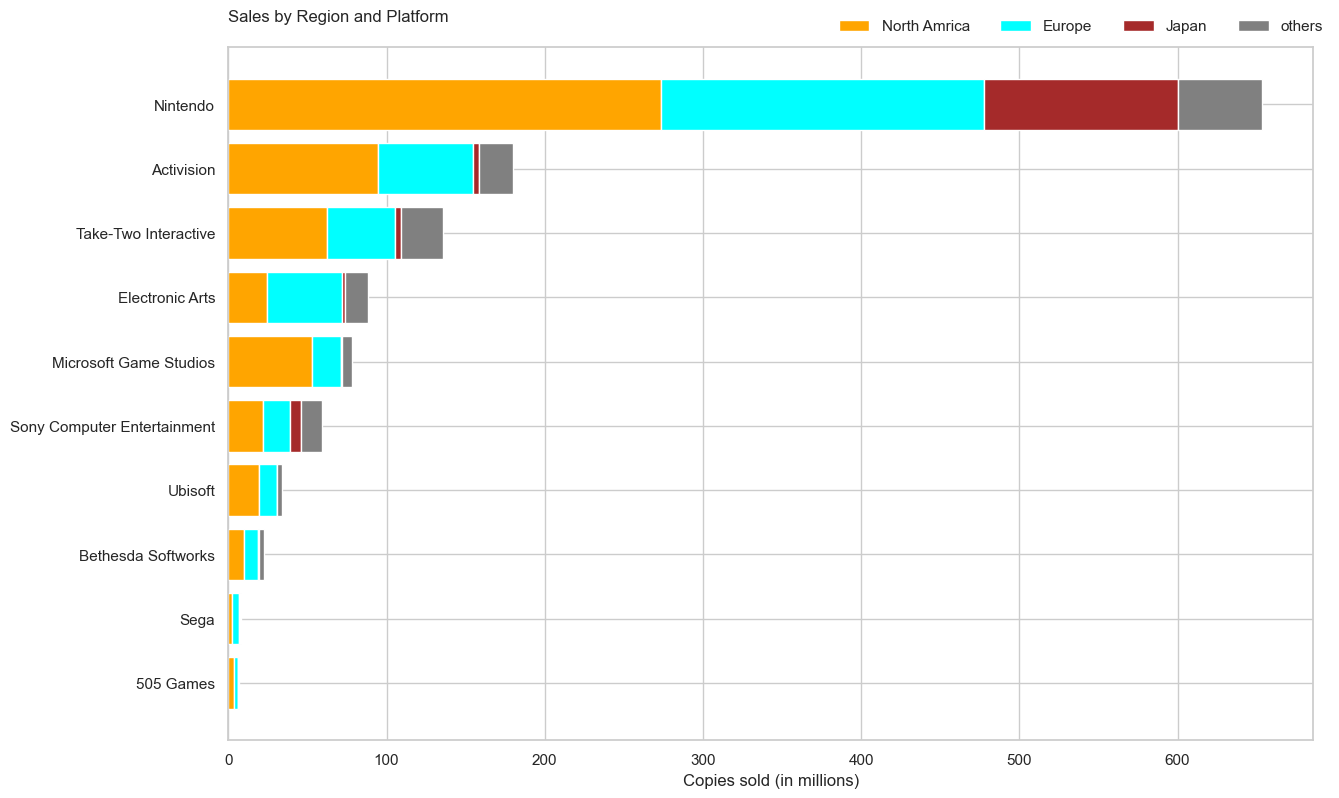

In [3]:
videogames_grouped = videogames.groupby('Publisher').sum()
videogames_grouped = videogames_grouped.sort_values('Global_Sales')

category1 = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
category2 = ["orange", "cyan", "brown","grey"]
category3 = ['North Amrica', 'Europe', 'Japan', 'others']

figures, axis = plt.subplots(1, figsize=(14,9))

left = len(videogames_grouped) * [0]
                             
for con, name in enumerate(category1):
    plt.barh(videogames_grouped.index, videogames_grouped[name], linestyle="solid", left=left, color=category2[con])
    left = left + videogames_grouped[name]
                             
plt.title('Sales by Region and Platform\n', loc='left')
plt.legend(category3, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Copies sold (in millions)')
                             
axis.set_axisbelow(True)

plt.show()

Using a stack column chart is a good way to display the copies sold in the different Regions of the world. Nintendo has clearly the highest copies sold in the various market, followed by Activision and Take-Two Interactive. North America and Europe seem to be the dominant markets with the most copies sold. Europe edges out North America for Electronic ARts purchases, which could be explained by the sells of "Fifa". Japan is fairly small compared to the former markets but does have a high number of sales compartively for the Nintendo platform.

### Question 2: Global Sales by Year: Create a line chart to show the total global sales for each year. Explain the result of the chart in markdow

Text(0, 0.5, 'Global Sales (Mio Dollars)')

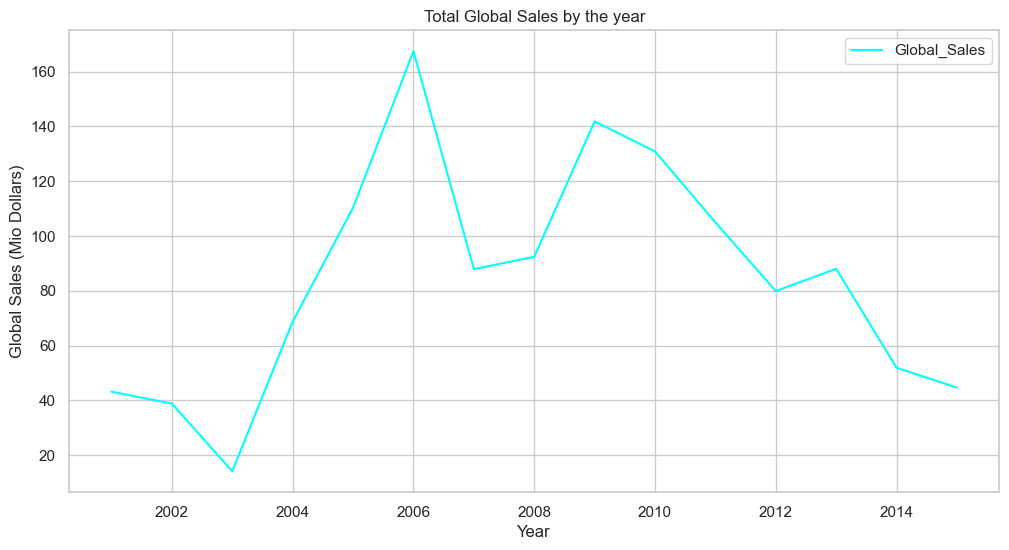

In [4]:
yearly_global_sales = videogames[['Year', 'Global_Sales']].groupby('Year').sum()
yearly_global_sales.plot(kind="line", figsize=(12,6), color="cyan", linestyle="solid", title= 'Total Global Sales by the year')
plt.ylabel("Global Sales (Mio Dollars)")

The linestyle illustrates the total global sales by the year, whereas 2006 was the peak with over 160 mio copies sold. Since 2009, the global sales seem to be gradually discreasing though.

### Question 3: Global Sales Distribution for Action Games: Create a histogram to show the global sales distribution for games with Action as the genre. Explain the chart with markdown.


<AxesSubplot: title={'center': 'Action Videogames sales distribution'}, ylabel='Frequency'>

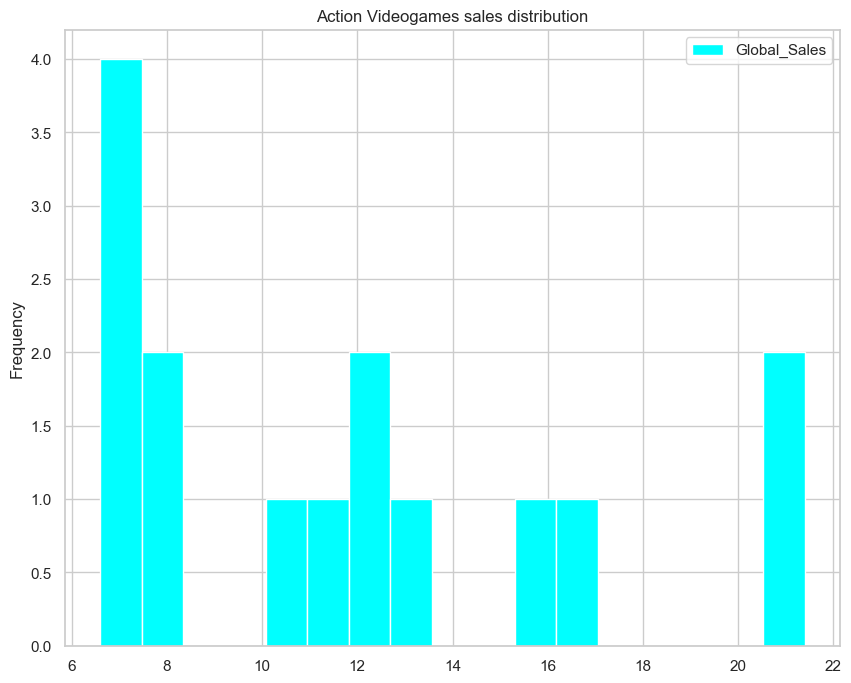

In [5]:
action_games = videogames[videogames['Genre'] == 'Action']
action_games[['Global_Sales']].plot(kind ='hist', bins=17, figsize=(10,8), color="cyan", linestyle="solid", title = 'Action Videogames sales distribution')

For the action Genre some of the games were between 7 to 9 millions sold globally. There seems to be a high concentration for the genre between 10 and 13 millions, around 16 millions and 21 millions as well.

### Question 4: North American Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the North American market. (Group smaller “slices” together into an “other” category to create an easier to read chart) Detail what is included in the other category. Explain the chart using markdown.

In [6]:
NA_sales_grouped_by_genre = videogames[['Genre', 'NA_Sales']].groupby('Genre').sum()
NA_sales_grouped_by_genre= NA_sales_grouped_by_genre.sort_values('NA_Sales')
NA_sales_grouped_by_genre

,NA_Sales
Genre,
Puzzle,3.44
Fighting,14.40
Simulation,14.61
Role-Playing,50.48
Platform,52.67
Racing,56.45
Misc,70.60
Action,77.81
Sports,84.87


Text(0.5, 1.0, 'Genre divided by the North American Market in Sales (Percentage)')

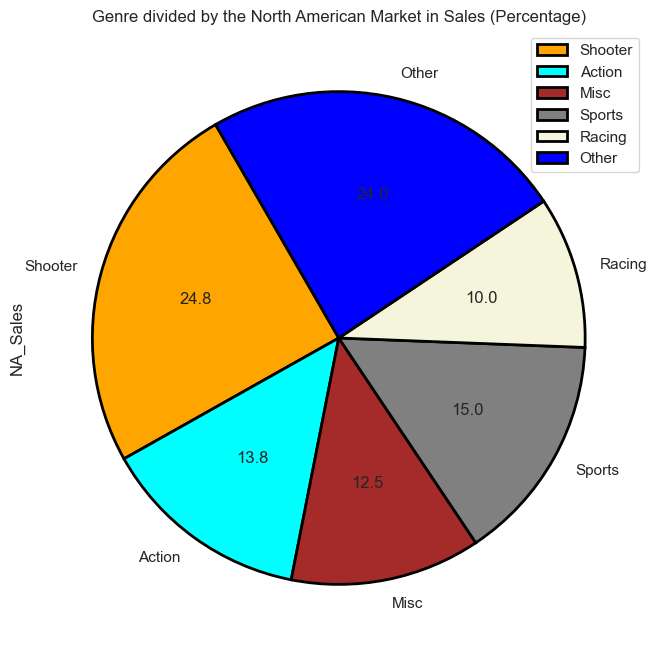

In [7]:
Shooter = NA_sales_grouped_by_genre.loc['Shooter'].values[0]
Sports = NA_sales_grouped_by_genre.loc['Sports'].values[0]
Action = NA_sales_grouped_by_genre.loc['Action'].values[0]
Misc = NA_sales_grouped_by_genre.loc['Misc'].values[0]
Racing = NA_sales_grouped_by_genre.loc['Racing'].values[0]
Other = (NA_sales_grouped_by_genre.loc['Platform'].values[0] +
      NA_sales_grouped_by_genre.loc['Fighting'].values[0] +
      NA_sales_grouped_by_genre.loc['Puzzle'].values[0] +
      NA_sales_grouped_by_genre.loc['Simulation'].values[0] +
      NA_sales_grouped_by_genre.loc['Role-Playing'].values[0]
      )

index = ['Shooter', 'Action', 'Misc', 'Sports', 'Racing', 'Other']
colors = ( "orange", "cyan", "brown",
          "grey", "beige", "blue")


wp = { 'linewidth' : 2, 'edgecolor' : "black" }

NA_sales_grouped_by_genre_df = pd.DataFrame({'NA_Sales': [Shooter, Action, Misc, Sports, Racing, Other]
                  }, index=index)

plot = NA_sales_grouped_by_genre_df.plot.pie(y = 'NA_Sales', colors=colors, startangle = 120, wedgeprops = wp, autopct="%.1f", figsize=(11, 8))
plt.title("Genre divided by the North American Market in Sales (Percentage)")


The biggest Genre in the North American Market is Shooter by far. After that follows Sports, Action, Misc and Racing. The smaller Genres have been grouped together and are labeled "Other".

### Question 5: European Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the European market. (Group smaller “slices” together into an “other” category to create an easier to read chart) Detail what is included in the other category. Explain the chart using markdown.

In [8]:
EU_sales_grouped_by_genre = videogames[['Genre', 'EU_Sales']].groupby('Genre').sum()
EU_sales_grouped_by_genre = EU_sales_grouped_by_genre.sort_values('EU_Sales')
EU_sales_grouped_by_genre

,EU_Sales
Genre,
Fighting,5.00
Puzzle,5.36
Simulation,23.26
Platform,33.12
Role-Playing,36.20
Racing,44.03
Misc,48.00
Action,58.15
Shooter,81.63


Text(0.5, 1.0, 'Genre divided by the European Market in Sales (Percentage)')

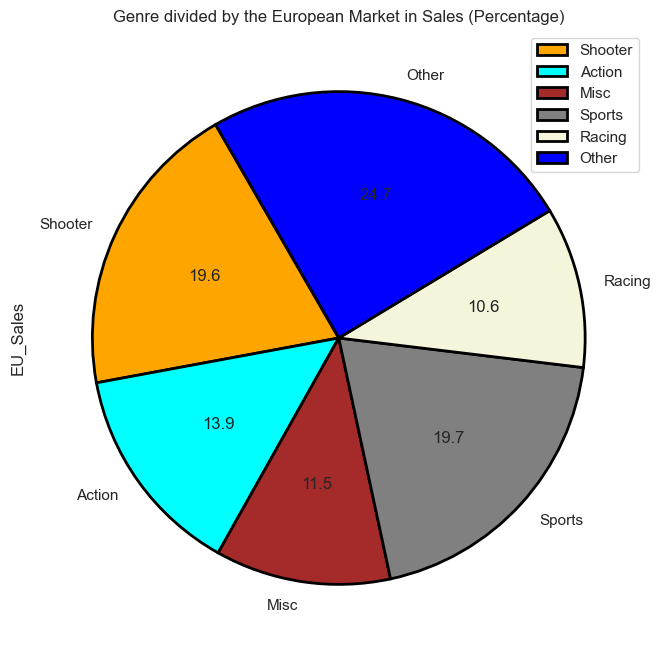

In [9]:
Sports = EU_sales_grouped_by_genre.loc['Sports'].values[0]
Shooter = EU_sales_grouped_by_genre.loc['Shooter'].values[0]
Action = EU_sales_grouped_by_genre.loc['Action'].values[0]
Misc = EU_sales_grouped_by_genre.loc['Misc'].values[0]
Racing = EU_sales_grouped_by_genre.loc['Racing'].values[0]
Other = (EU_sales_grouped_by_genre.loc['Platform'].values[0] +
      EU_sales_grouped_by_genre.loc['Fighting'].values[0] +
      EU_sales_grouped_by_genre.loc['Puzzle'].values[0] +
      EU_sales_grouped_by_genre.loc['Simulation'].values[0] +
      EU_sales_grouped_by_genre.loc['Role-Playing'].values[0] 
      )

index = ['Shooter', 'Action', 'Misc', 'Sports', 'Racing', 'Other']
colors = ( "orange", "cyan", "brown",
          "grey", "beige", "blue")

wp = { 'linewidth' : 2, 'edgecolor' : "black" }

EU_sales_grouped_by_genre_df = pd.DataFrame({'EU_Sales': [Shooter, Action, Misc, Sports, Racing, Other]
                  }, index=index)

plot = EU_sales_grouped_by_genre_df.plot.pie(y = 'EU_Sales', colors=colors, startangle = 120, wedgeprops = wp, autopct="%.1f", figsize=(11, 8))
plt.title("Genre divided by the European Market in Sales (Percentage)")

The biggest Genre in Europe is Sports, followed by shooter, action, misc and racing. The smaller Genres have been grouped together and are labeled "Other".

### Question 6: Explain differences and similarities between the North American and European charts in markdown.

The major difference is that Shooter is the dominant Genre in the NA Market whereas Sports edges out shooter in the European Market. Reasons could be the COD popularity in NA and Fifa in the European market. Other than that the other genres are more or less equally distributed when comparing those two markets.

### Question 7: Count of Games by Platform: Create a bar (or column) chart to show the total number of games created for each platform in the dataset. Explain the results in markdown.


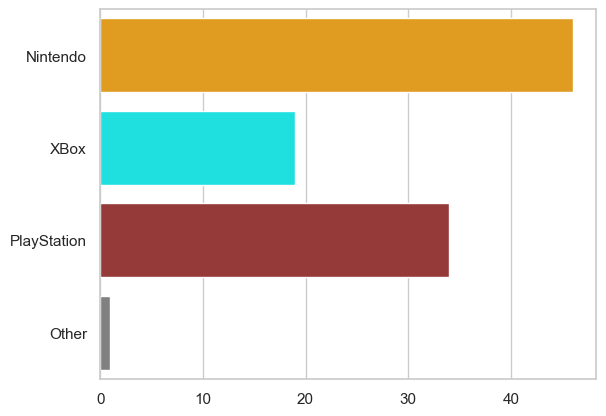

In [10]:
nintendo = videogames[videogames['Platform']=='Nintendo'].count()
nintendo = nintendo['Platform']
xbox = videogames[videogames['Platform']=='XBox'].count()
xbox = xbox['Platform']
playstation = videogames[videogames['Platform']=='PlayStation'].count()
playstation = playstation['Platform']
other = videogames[videogames['Platform']=='Other'].count()
other = other['Platform']

platform_values = np.array([nintendo, xbox, playstation, other])
platform_labels = np.array(['Nintendo', 'XBox', 'PlayStation', 'Other'])

sns.barplot(y=platform_labels, x=platform_values, linestyle="solid", palette=["orange", "cyan", "brown","grey"])
plt.show()

Nintendo is the clear frontrunner regarding games created per platform, with over 40 millions. That is followed by Playstation with slightly over 30 millions and Xbox slightly under 20 million games created respectively.

## Determine the appropriate charts to answer the following questions

What genre of game is present the most in the top 100 games from 2000-2015?
What percentage of global sales does PlayStation have in the dataset?
What is the distribution of sales for Shooter games?

In [11]:
top_games = videogames.groupby('Global_Sales')
top_games = videogames[(videogames['Year'] >= 2000) & (videogames['Year'] <= 2015)]
top_games = top_games[:100]
seve = top_games['Genre'].unique()
seve

array(['Sports', 'Racing', 'Platform', 'Misc', 'Simulation', 'Action',
       'Role-Playing', 'Puzzle', 'Shooter', 'Fighting'], dtype=object)

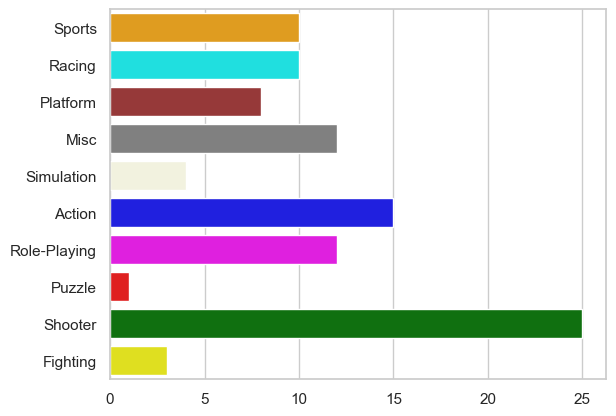

In [18]:
Sports = top_games[top_games['Genre']=='Sports'].count()
Sports = Sports["Name"]
Racing = top_games[top_games['Genre']=='Racing'].count()
Racing = Racing["Name"]
Platform = top_games[top_games['Genre']=='Platform'].count()
Platform= Platform["Name"]
Misc = top_games[top_games['Genre']=='Misc'].count()
Misc = Misc["Name"]
Simulation = top_games[top_games['Genre']=='Simulation'].count()
Simulation = Simulation["Name"]
Action = top_games[top_games['Genre']=='Action'].count()
Action = Action["Name"]
Role_Playing = top_games[top_games['Genre']=='Role-Playing'].count()
Role_Playing = Role_Playing["Name"]
Puzzle = top_games[top_games['Genre']=='Puzzle'].count()
Puzzle = Puzzle["Name"]
Shooter = top_games[top_games['Genre']=='Shooter'].count()
Shooter = Shooter["Name"]
Fighting = top_games[top_games['Genre']=='Fighting'].count()
Fighting = Fighting["Name"]

platform_values = np.array([Sports, Racing, Platform, Misc, Simulation, Action, Role_Playing, Puzzle, Shooter, Fighting])
platform_labels = np.array(['Sports', 'Racing', 'Platform', 'Misc', 'Simulation', 'Action', 'Role-Playing', 'Puzzle', 'Shooter', 'Fighting'])

sns.barplot(y=platform_labels, x=platform_values, linestyle="solid", palette=["orange", "cyan", "brown",
          "grey", "beige", "blue", "magenta", "red", "green", "yellow"])
plt.show()

#### What genre of game is present the most in the top 100 games from 2000-2015?:
Shooter is by far the most dominant genre in that time span, accumulating to 25 of the 100 top games between 2000 and 2015 That is followed by Action, Misc and Role_playing.

In [13]:
playstation = videogames['Platform'].unique()
playstation

array(['Nintendo', 'XBox', 'PlayStation', 'Other'], dtype=object)

In [14]:
global_sales_by_platform = videogames[['Platform', 'Global_Sales']].groupby('Platform').sum()
global_sales_by_platform = global_sales_by_platform.sort_values('Global_Sales')
global_sales_by_platform

,Global_Sales
Platform,
Other,8.11
XBox,212.47
PlayStation,342.67
Nintendo,702.01


Text(0.5, 1.0, 'Global Sales by Platform')

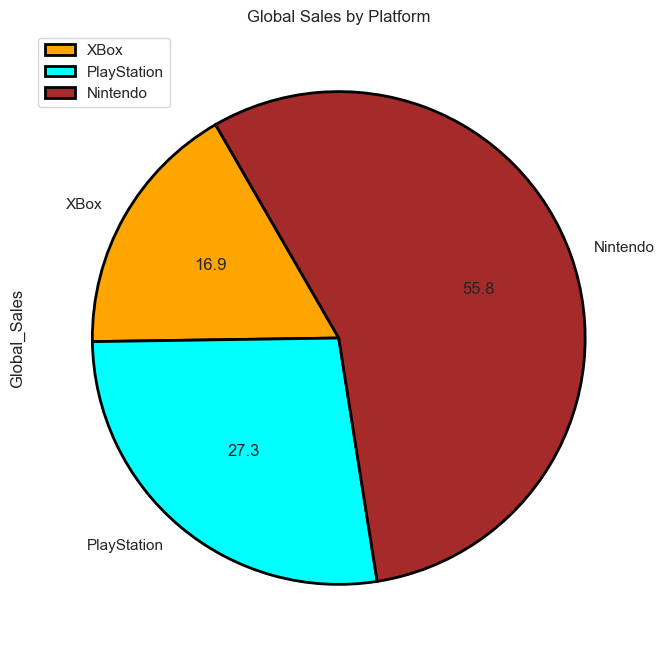

In [15]:

xbox = global_sales_by_platform.loc['XBox'].values[0]
playstation = global_sales_by_platform.loc['PlayStation'].values[0]
nintendo = global_sales_by_platform.loc['Nintendo'].values[0]


index = ['XBox', 'PlayStation', 'Nintendo']

wp = { 'linewidth' : 2, 'edgecolor' : "black" }

colors = ( "orange", "cyan", "brown")

global_sales_by_platform_df = pd.DataFrame({'Global_Sales': [xbox, playstation, nintendo]
                  }, index=index)

plot = global_sales_by_platform_df.plot.pie(y = 'Global_Sales', colors=colors, startangle = 120, wedgeprops = wp, autopct="%.1f", figsize=(11, 8))
plt.title("Global Sales by Platform")

#### What percentage of global sales does PlayStation have in the dataset?
Playsation has 27.3 % of the global sales as illustrated by the above pie chart.

<AxesSubplot: title={'center': 'Distribution of Sale for shooter GAmes'}, ylabel='Frequency'>

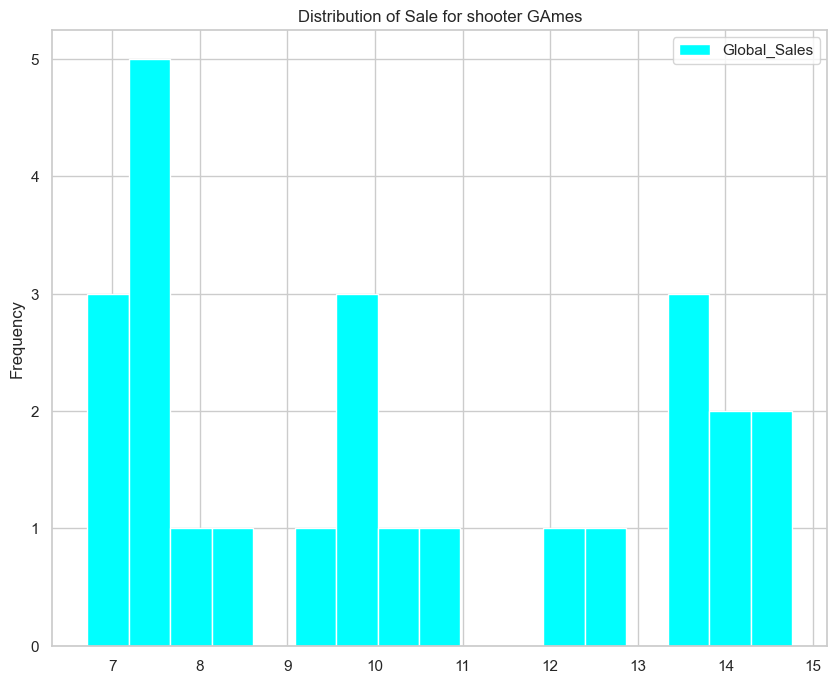

In [16]:
action_games = videogames[videogames['Genre'] == 'Shooter']
action_games[['Global_Sales']].plot(kind ='hist', bins=17, figsize=(10,8), color="cyan", linestyle="solid", title = 'Distribution of Sale for shooter GAmes')

#### What is the distribution of sales for Shooter games?
Shooter Games have mostly sold between 7 to 11 millions times globally, as well as 12 to 15 million times.